In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Dell/Downloads/website_traffic.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


(None,
    Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
 0           5         11.051381     0.230652        Organic      3.890460   
 1           4          3.429316     0.391001         Social      8.478174   
 2           4          1.621052     0.397986        Organic      9.636170   
 3           5          3.629279     0.180458        Organic      2.071925   
 4           5          4.235843     0.291541           Paid      1.960654   
 
    Previous Visits  Conversion Rate  
 0                3              1.0  
 1                0              1.0  
 2                2              1.0  
 3                3              1.0  
 4                5              1.0  )

In [7]:
import warnings
warnings.filterwarnings("ignore")

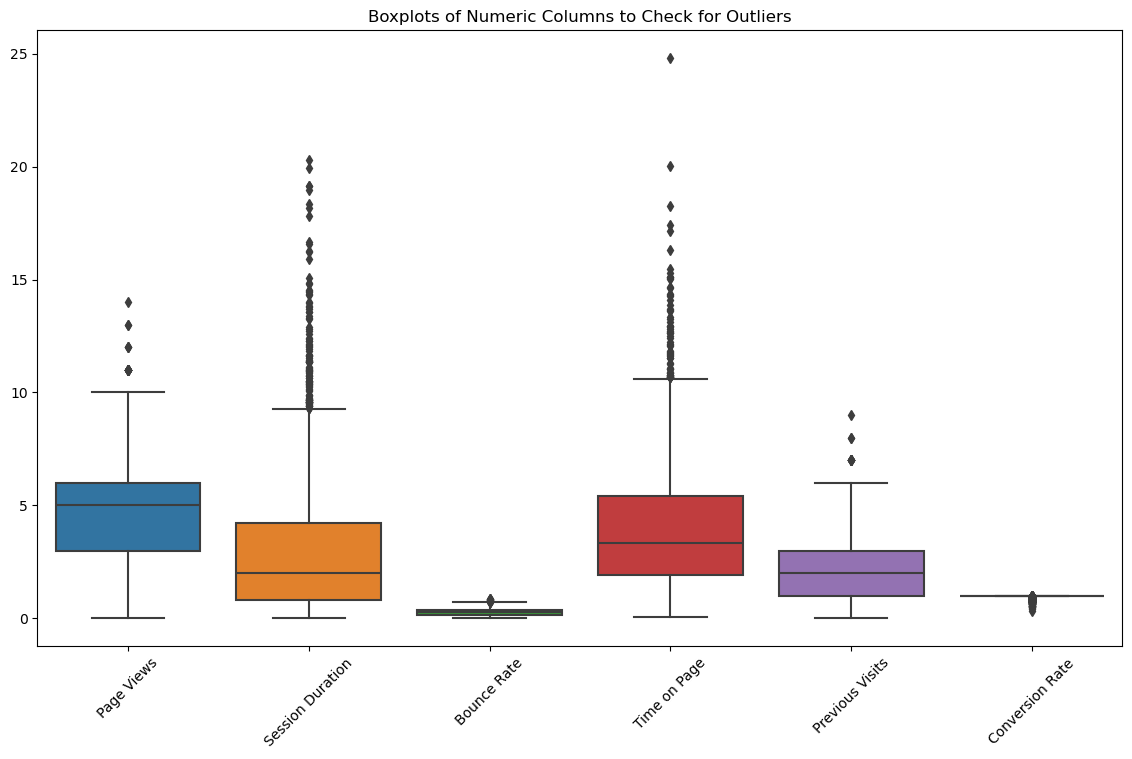

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns to check for outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Columns to Check for Outliers")
plt.show()


In [3]:
# Checking for outliers in 'Session Duration' and 'Bounce Rate' using IQR method
Q1_session_duration = data['Session Duration'].quantile(0.25)
Q3_session_duration = data['Session Duration'].quantile(0.75)
IQR_session_duration = Q3_session_duration - Q1_session_duration

Q1_bounce_rate = data['Bounce Rate'].quantile(0.25)
Q3_bounce_rate = data['Bounce Rate'].quantile(0.75)
IQR_bounce_rate = Q3_bounce_rate - Q1_bounce_rate

# Define the upper and lower bounds for outliers
lower_bound_session = Q1_session_duration - 1.5 * IQR_session_duration
upper_bound_session = Q3_session_duration + 1.5 * IQR_session_duration

lower_bound_bounce = Q1_bounce_rate - 1.5 * IQR_bounce_rate
upper_bound_bounce = Q3_bounce_rate + 1.5 * IQR_bounce_rate

# Identifying outliers in 'Session Duration' and 'Bounce Rate'
outliers_session_duration = data[(data['Session Duration'] < lower_bound_session) | (data['Session Duration'] > upper_bound_session)]
outliers_bounce_rate = data[(data['Bounce Rate'] < lower_bound_bounce) | (data['Bounce Rate'] > upper_bound_bounce)]

len(outliers_session_duration), len(outliers_bounce_rate)


(112, 13)

## Step 1: Cap the Outliers

In [4]:
# Cap the outliers
data['Session Duration'] = data['Session Duration'].clip(lower=lower_bound_session, upper=upper_bound_session)
data['Bounce Rate'] = data['Bounce Rate'].clip(lower=lower_bound_bounce, upper=upper_bound_bounce)


## Step 2: Encode the Categorical Variable

In [5]:
# One-hot encode 'Traffic Source' and drop the first column to avoid multicollinearity
data = pd.get_dummies(data, columns=['Traffic Source'], drop_first=True)


## Step 3: Conduct Exploratory Data Analysis (EDA)

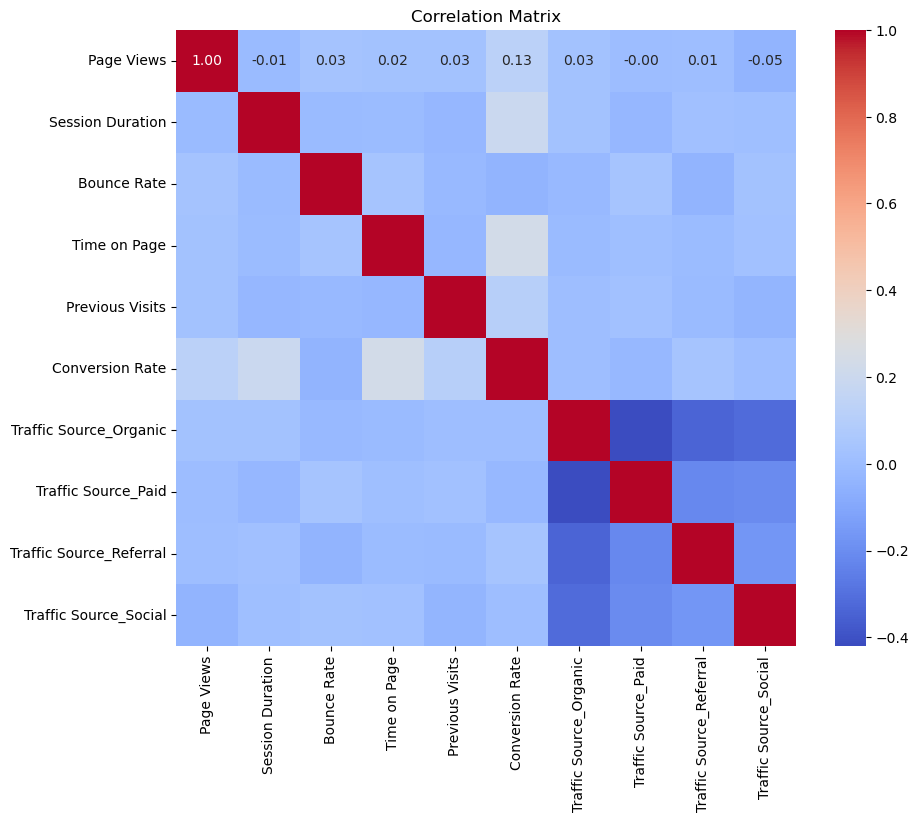

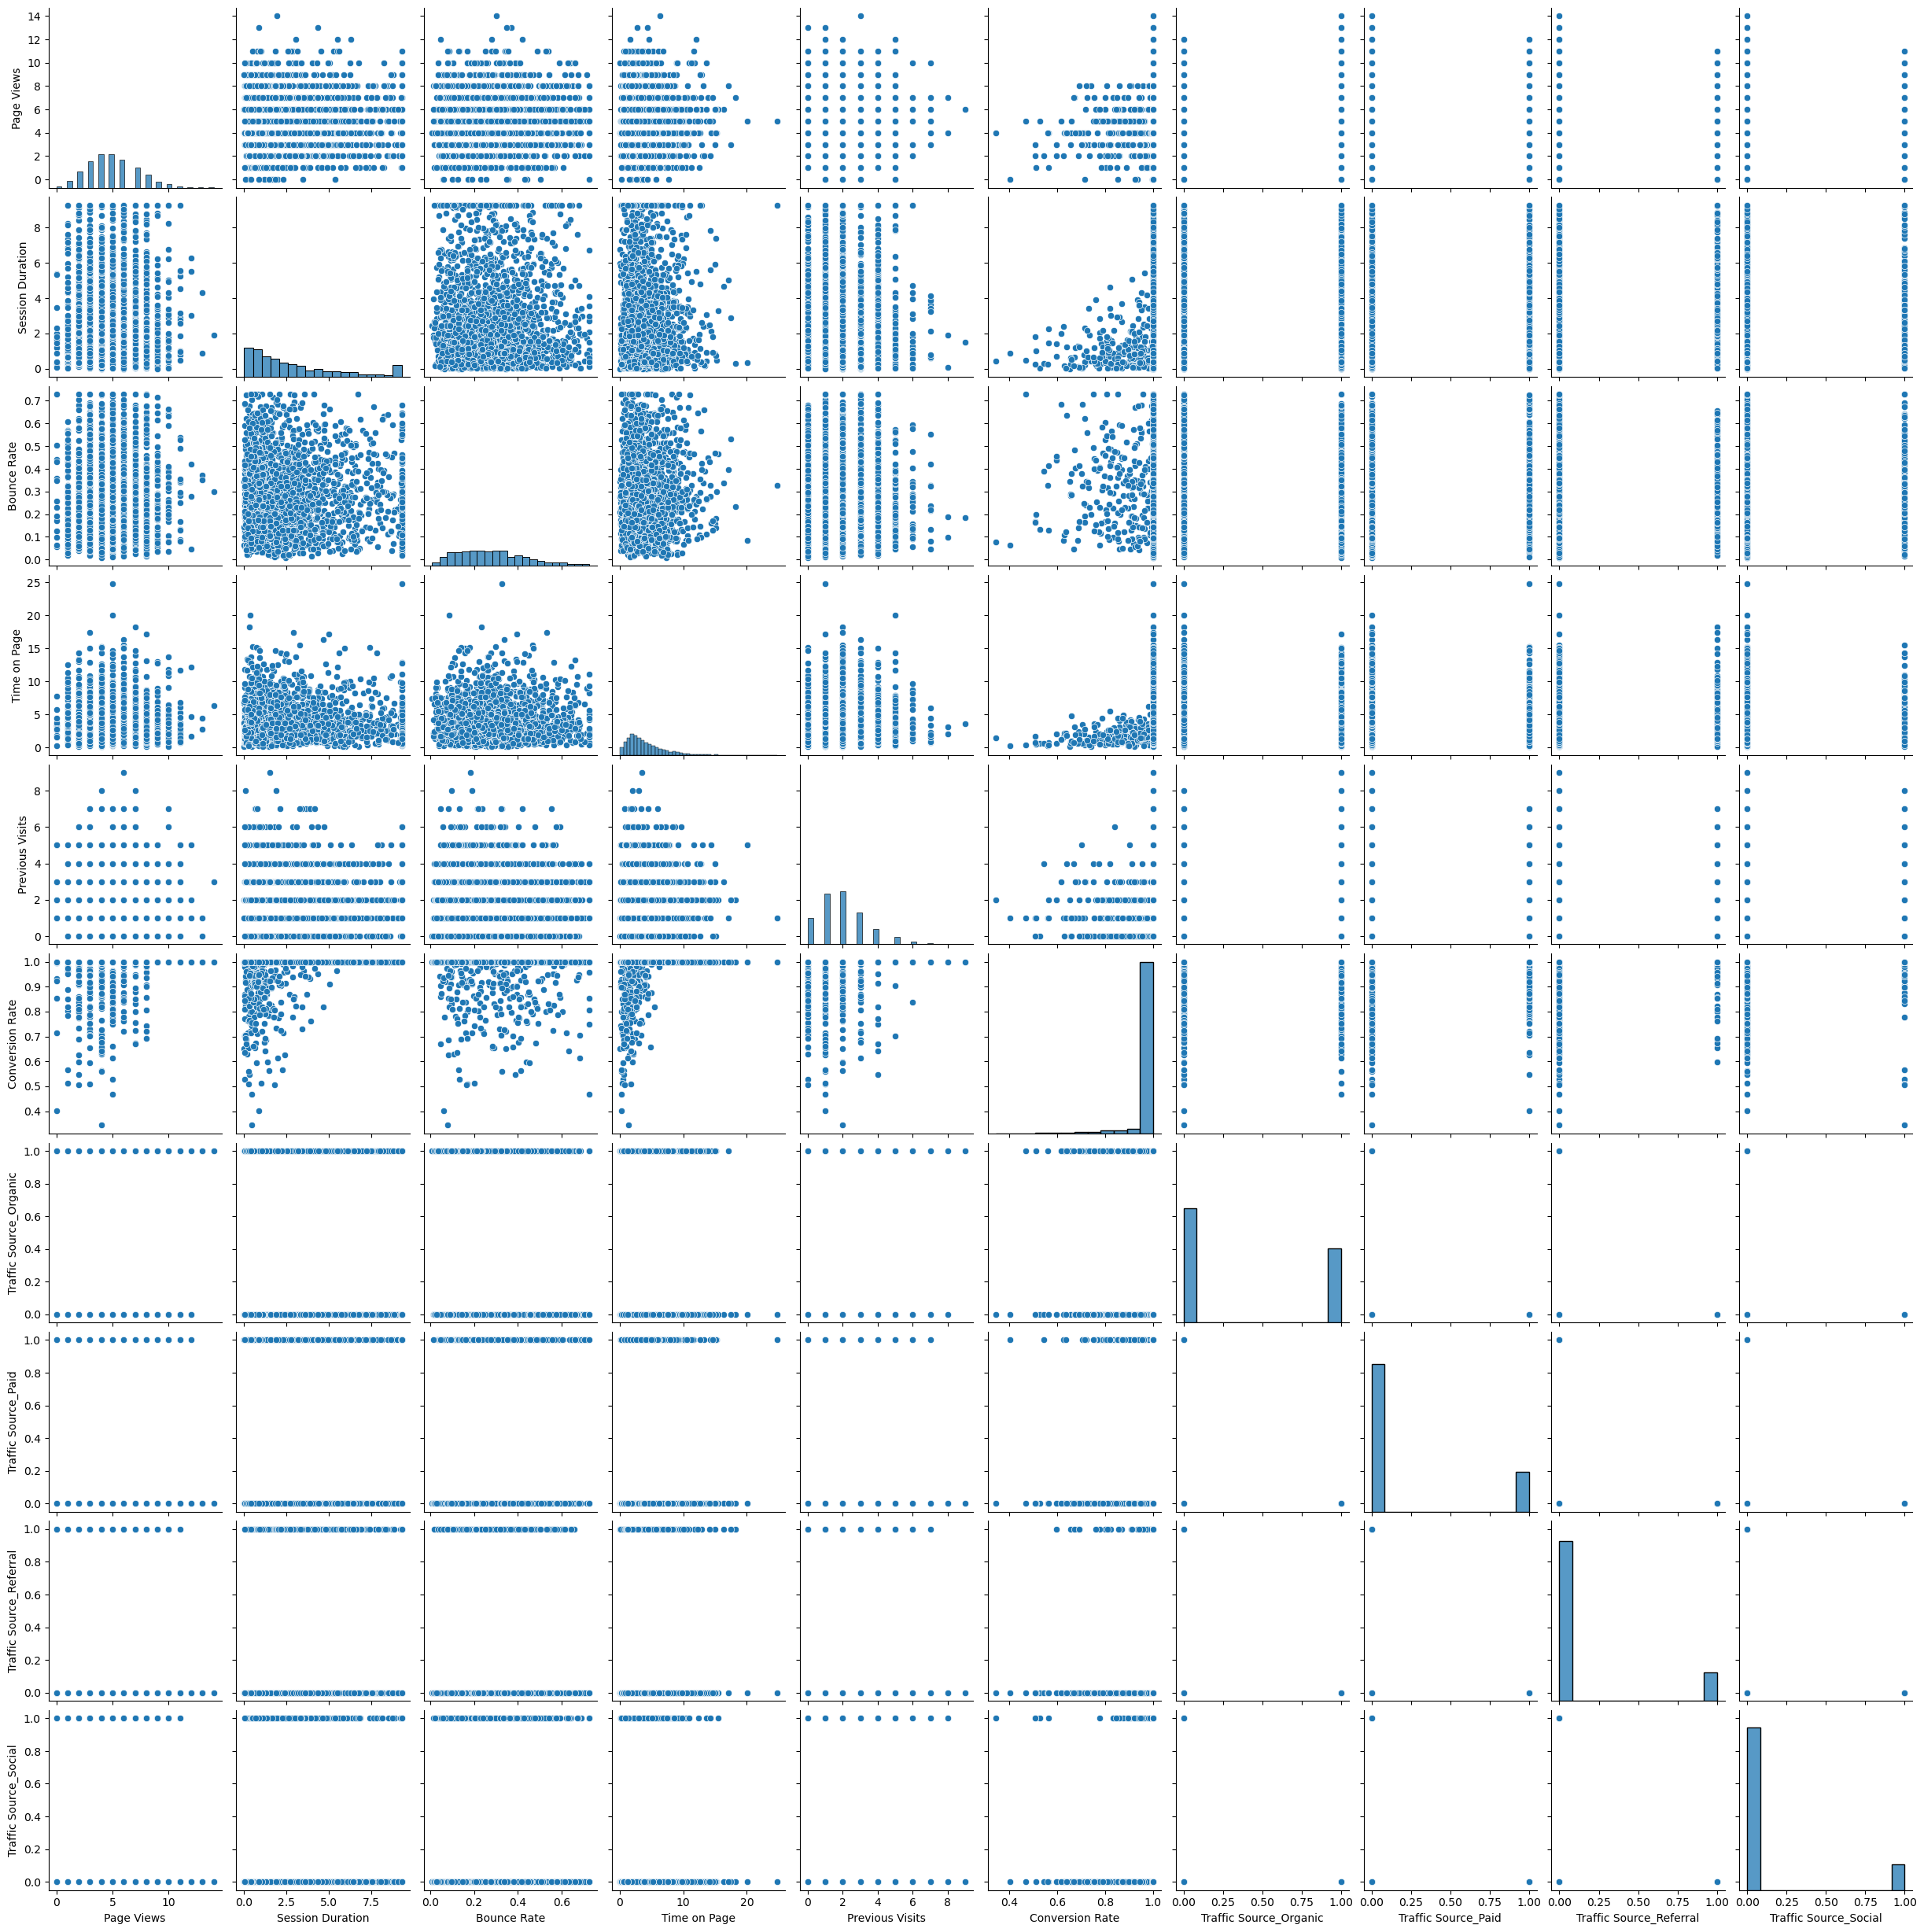

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix to identify strong predictors
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot matrix
sns.pairplot(data)
plt.show()


## Step 4: Split the Data

In [10]:
from sklearn.model_selection import train_test_split

# Define X and y
X = data.drop('Conversion Rate', axis=1)
y = data['Conversion Rate']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Implement Multiple Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)
adjusted_r2_linear = 1 - (1 - r2_linear) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Multiple Linear Regression Metrics:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R^2:", r2_linear)
print("Adjusted R^2:", adjusted_r2_linear)


Multiple Linear Regression Metrics:
MAE: 0.03156363966007932
MSE: 0.002785093173713522
RMSE: 0.05277398197704549
R^2: 0.10813200473474682
Adjusted R^2: 0.10409843088681359


## Step 6: Implement Polynomial Regression 
#### Transform features to include polynomial terms (e.g., degree 2 or 3) and evaluate the model performance.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # or degree=3
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_poly_test)

# Calculate evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)
adjusted_r2_poly = 1 - (1 - r2_poly) * (len(y) - 1) / (len(y) - X_poly_train.shape[1] - 1)

print("\nPolynomial Regression Metrics:")
print("MAE:", mae_poly)
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R^2:", r2_poly)
print("Adjusted R^2:", adjusted_r2_poly)



Polynomial Regression Metrics:
MAE: 0.02898927816257283
MSE: 0.0024037111261412353
RMSE: 0.049027656747403656
R^2: 0.23026165030955592
Adjusted R^2: 0.20848407354362253


## Step 7: Compare Models and Visualize Results
#### Compare the performance of the two models and plot the actual vs. predicted values for each.

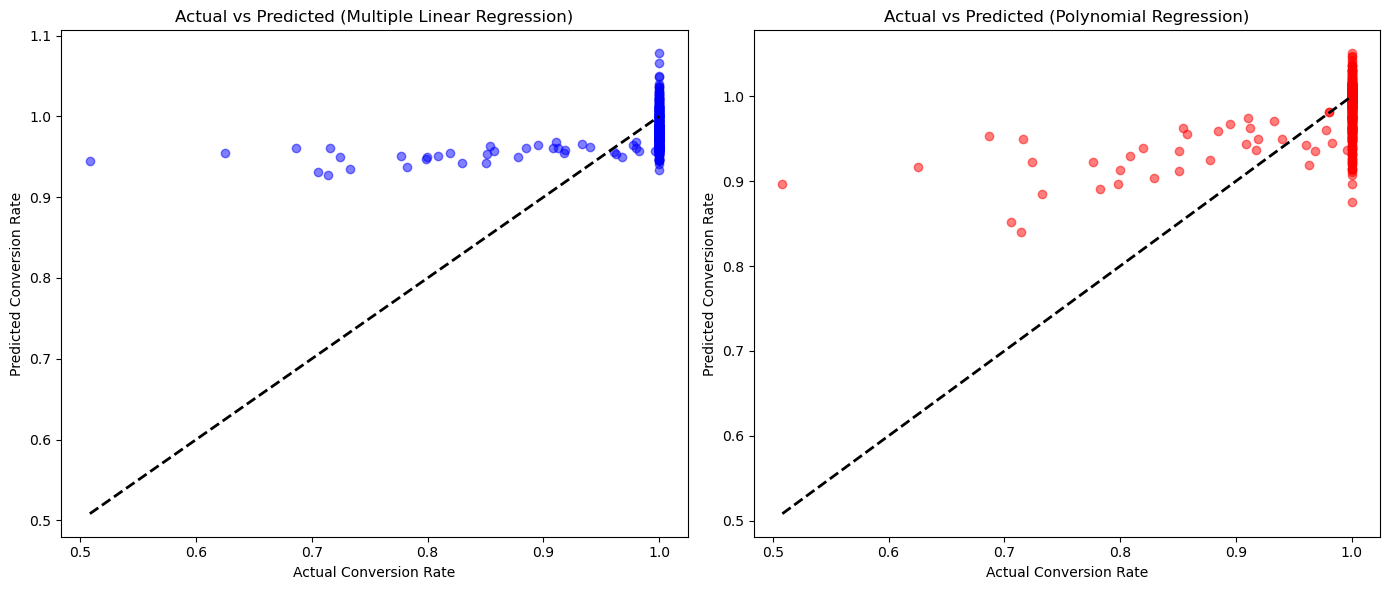

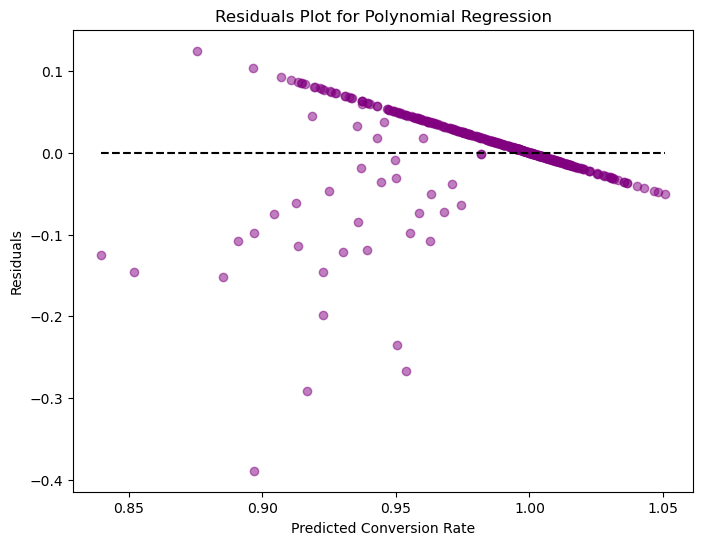

In [13]:
# Actual vs Predicted plot for both models
plt.figure(figsize=(14, 6))

# Multiple Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.xlabel("Actual Conversion Rate")
plt.ylabel("Predicted Conversion Rate")

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color="red", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.xlabel("Actual Conversion Rate")
plt.ylabel("Predicted Conversion Rate")

plt.tight_layout()
plt.show()

# Plot residuals for Polynomial Regression
residuals = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals, color="purple", alpha=0.5)
plt.hlines(y=0, xmin=y_pred_poly.min(), xmax=y_pred_poly.max(), color="black", linestyles="dashed")
plt.title("Residuals Plot for Polynomial Regression")
plt.xlabel("Predicted Conversion Rate")
plt.ylabel("Residuals")
plt.show()
